#### Import the mortgage_package

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import mortgage_package as mp

#### Import the dataframe. 

### Let's use demo data from average home price by area from in and around Vancouver.

In [2]:
properties = pd.read_csv('data/vancouver_area_testing_set.csv', usecols = [0,1])
properties.head()

,Area,House Price
0,Downtown & Westside,3118200
1,West Vancouver,2743600
2,North Vancouver,1665100
3,Richmond,1581600
4,South Burnaby,1564000


#### What properties can we afford with a downpayment of 190,000 and monthly payment of 4,800? Let's try a term of 15 years.

In [3]:
mp.property_filter(property_data = properties,
                   downpayment = 190000,
                   mortgage_term = 15,
                   max_monthly_payment = 4800)

Lengths greater than 10 years are not typically available. Terms must range from 1 to 10 years, but calculation will be performed anyway.
You can afford 5 properties from the 25 you've provided.


,Property/Area,Price,Minimum_Downpayment,Mortgage_Insurance,Principal,Monthly_Payment,Shortest_Amortization,Total_Interest,Net_Cost
20,Pitt Meadows,974800,72480.0,18793.83,803593.83,4767.48,24,569440.84,1563034.67
21,North Delta,972500,72250.0,18702.26,801202.26,4753.29,24,567746.53,1558948.79
22,Maple Ridge,884200,63420.0,0.00,694200.00,4698.63,19,377088.77,1261288.77
23,Abbotsford,873600,62360.0,0.00,683600.00,4782.72,18,349446.77,1223046.77
24,Mission,726000,47600.0,0.00,536000.00,4662.46,13,191344.02,917344.02


#### We note the warning which is that terms must be greater than 10 years.

#### Terms refers to the interest rate contract with the bank. Banks don't typically offer terms beyond 10 years but the functino handles the exception anyways.

#### Lets try using a mortgage rate of our own, say 3.2%.

In [4]:
mp.property_filter(property_data = properties,
                   downpayment = 190000,
                   mortgage_rate = 3.2,
                   max_monthly_payment = 4800)

You can afford 5 properties from the 25 you've provided.


,Property/Area,Price,Minimum_Downpayment,Mortgage_Insurance,Principal,Monthly_Payment,Shortest_Amortization,Total_Interest,Net_Cost
20,Pitt Meadows,974800,72480.0,18793.83,803593.83,4708.46,19,269922.39,1263516.22
21,North Delta,972500,72250.0,18702.26,801202.26,4694.45,19,269118.84,1260321.10
22,Maple Ridge,884200,63420.0,0.00,694200.00,4624.58,16,193719.74,1077919.74
23,Abbotsford,873600,62360.0,0.00,683600.00,4786.85,15,178020.00,1051620.00
24,Mission,726000,47600.0,0.00,536000.00,4487.42,12,110175.82,836175.82


#### Notice how the amortization, interest, and net costs have changed with the new interest rate.

#### Lets try one more time with a high downpayment and low monthly payment scenario. We'll assume there's a loan limit of 650,000.

In [5]:
mp.property_filter(property_data = properties,
                downpayment = 500000,
                mortgage_rate = 4,
                max_monthly_payment = 3500,
                max_loan = 650000)

You can afford 13 properties from the 25 you've provided.


,Property/Area,Price,Minimum_Downpayment,Mortgage_Insurance,Principal,Monthly_Payment,Shortest_Amortization,Total_Interest,Net_Cost
12,New Westminster,1127200,225440.0,0,627200,3479.39,23,333113.80,1460313.80
13,Langley,1090800,218160.0,0,590800,3469.05,21,283402.14,1374202.14
14,Cloverdale,1087400,217480.0,0,587400,3449.09,21,281759.15,1369159.15
15,Central Surrey,1086300,217260.0,0,586300,3442.63,21,281243.09,1367543.09
16,Ladner,1042000,208400.0,0,542000,3397.64,19,232649.56,1274649.56
17,Port Coquitlam,1034400,206880.0,0,534400,3474.66,18,216113.91,1250513.91
18,Squamish,1016600,203320.0,0,516600,3494.25,17,196215.03,1212815.03
19,North Surrey,1015700,203140.0,0,515700,3488.16,17,195885.00,1211585.00
20,Pitt Meadows,974800,72480.0,0,474800,3352.07,16,168786.28,1143586.28
21,North Delta,972500,72250.0,0,472500,3495.03,15,156592.67,1129092.67


### We can see that no mortgage insurance is applied. In Canada, downpayments >20% of the home price do not require mortgage insurance.

### We also see the shortest possible amortization periods in each area and the cumulative cost over that period.

### If you'd like to look at one property or principal in particular and how price changes with parameters, base functions could be used as follows:

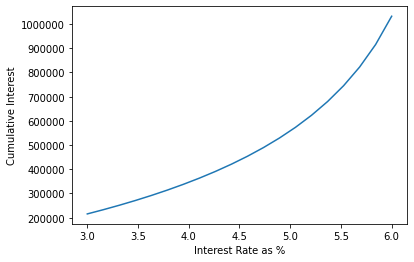

In [6]:
# How quickly does cumulative interest increase as the mortgage rate increases?
# Assumes a consistent monthly payment.

rate = np.linspace(3, 6, 20)
interest = [mp.total_interest(principal = 650000,
                                   mortgage_rate = i,
                                   monthly_payment = 3600) for i in rate]

plt.plot(rate, interest)
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel('Interest Rate as %')
plt.ylabel('Cumulative Interest')
plt.show()


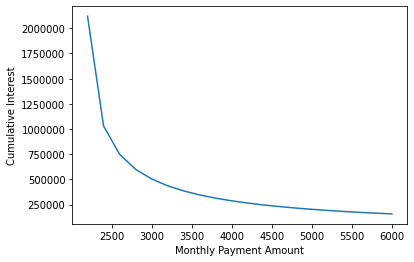

In [7]:
# How quickly does cumulative interest increase as monthly contributions increase?

payments = np.linspace(2200, 6000, 20)
interest = [mp.total_interest(principal = 650000,
                                   mortgage_rate = 4,
                                   monthly_payment = p) for p in payments]

plt.plot(payments, interest)
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel('Monthly Payment Amount')
plt.ylabel('Cumulative Interest')
plt.show()

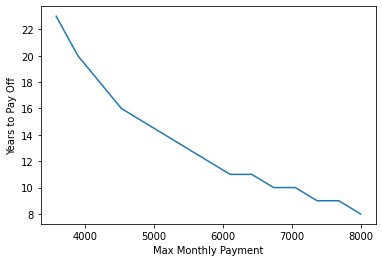

In [8]:
# How many years does it take to pay off a 650,000 principal with 
# max monthly payments ranging from 2000 to 8000?

payments = np.linspace(2000, 8000, 20)
years = [mp.optimal_monthly_payment(principal = 650000,
                                    mortgage_rate = 3.8,
                                    max_monthly_payment = p)[1] for p in payments]

plt.plot(payments, years)
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel('Max Monthly Payment')
plt.ylabel('Years to Pay Off')
plt.show()

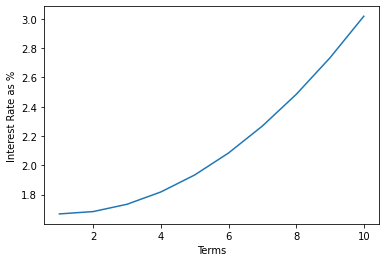

In [9]:
# What is the assumed function for mortgage term to rate conversion?

terms = np.arange(1, 11)
rate = [mp.mort_rate(t) for t in terms]
    
plt.plot(terms, rate)
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel('Terms')
plt.ylabel('Interest Rate as %')
plt.show()

In [10]:
# What's my monthly payment for a 10 year amortization period on a 650,000 principal adn 4% mortgage rate?

mp.monthly_payment(650000, 4.0, amortization = 10)

6580.93

Downpayment must be at least 5% the asset value 
Input value is too low to be legally considered.
Downpayment must be at least 5% the asset value 
Input value is too low to be legally considered.


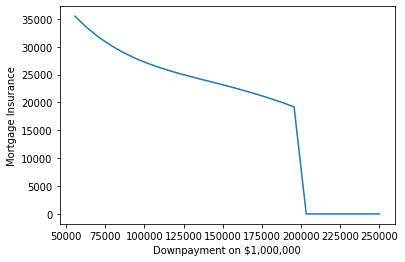

In [11]:
# Whats my mortgage insurance as downpayment changes on a 1,000,000 home?
# Notice how a message prints for downpayments < $50000, which is less than 5% the property value.
# Also notice how at a 20% downpayment, mortgage insurance no longer applies.

dp = np.linspace(40000, 250000, 28)
mort_ins = [mp.mortgage_insurance(1000000, x) for x in dp]

plt.plot(dp, mort_ins)
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel('Downpayment on $1,000,000')
plt.ylabel('Mortgage Insurance')
plt.show()